In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Marketing Campaign

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
path = '/content/drive/MyDrive/Copy of marketing_campaign.xlsx'

df = pd.read_excel(path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
df['month_Customer'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Total_Cmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [ ]:
df['Marital_Status']=df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Absurd':'Single',
                                                      'Widow':'Divorced','YOLO':'Single', 'Alone':'Single'})

In [ ]:
cats_updated = ['Education', 'Marital_Status']

for col in cats_updated:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Couple      1444
Single       487
Divorced     309
Name: Marital_Status, dtype: int64
------------------------------ 



In [ ]:
df['Has_child'] = np.where(df.Kidhome+df.Teenhome > 0, 'Yes', 'No')

Q1 = df.Income.quantile(.25)
Q3 = df.Income.quantile(.75)

def segment(x):
    try:
        x.Income.isnumeric()
    except:
        segment = 'No Sales'
    if x.Income >= Q3:
        segment = 'High'
    elif x.Income < Q3 and x.Income >= Q1:
        segment = 'Medium'
    else:
        segment = 'Low'
    return segment

df['Segmentasi'] = df.apply(lambda x: segment(x), axis = 1)
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,month_Customer,Spending,Total_Cmp,Has_child,Segmentasi
2235,10870,1967,Graduation,Couple,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,18,1341,0,Yes,Medium
2236,4001,1946,PhD,Couple,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,6,444,1,Yes,Medium
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1,1241,1,No,Medium
2238,8235,1956,Master,Couple,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,1,843,0,Yes,High
2239,9405,1954,PhD,Couple,52869.0,1,1,2012-10-15,40,84,...,0,0,3,11,1,34,172,0,Yes,Medium


In [ ]:
segment = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}
mapping_child = {
    'No' : 0,
    'Yes' : 1
}
mapping_pendidikan = {
    'Basic' : 0,
    '2n Cycle' : 1,
    'Graduation' : 2,
    'Master' : 3,
    'PhD' : 4,
}

df['Segmentasi'] = df['Segmentasi'].map(segment)
df['Education'] = df['Education'].map(mapping_pendidikan)
df['Has_child'] = df['Has_child'].map(mapping_child)

In [ ]:
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df[cat], prefix='MS')
    df = df.join(onehots)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## SMOTE

In [ ]:
X = df.drop(columns=['Response','Z_CostContact','Z_Revenue',
                     'ID','Year_Birth','Dt_Customer','Marital_Status', 'Teenhome','Kidhome' ])
y = df['Response'] # target / label

In [ ]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5, random_state = 666).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    1314
1     657
Name: Response, dtype: int64


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=666)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.60
Recall (Test Set): 0.70
F1-Score (Test Set): 0.64
AUC: 0.93


In [ ]:
print('Train score: ' + str(ab.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.8792491121258245
Test score:0.8887218045112782


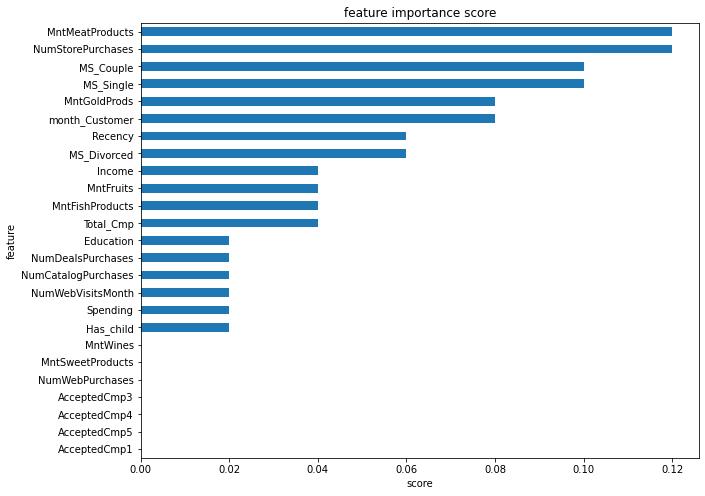

In [ ]:
show_feature_importance(ab)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  AcceptedCmp3         2216 non-null   int64  
 15  AcceptedCmp4         2216 non-null   i

## Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=666)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=666, cv=5, scoring='roc_auc')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.66
Recall (Test Set): 0.64
F1-Score (Test Set): 0.65
AUC: 0.94


In [ ]:
print('Train score: ' + str(ab_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(ab_tuned.score(X_test, y_test))) #accuracy

Train score: 0.9582583302637095
Test score:0.936511423550088


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1500
Best learning_rate: 0.05831578947368421
Best algorithm: SAMME.R


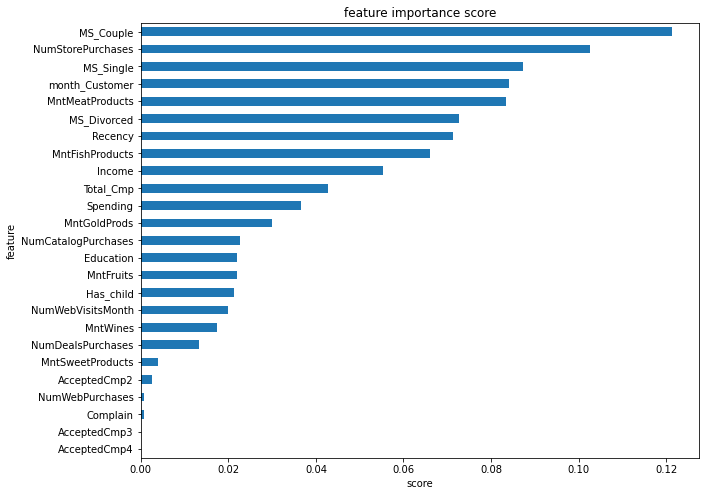

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

## Feature Importance

In [ ]:
X = df.drop(columns=['Response','Z_CostContact','Z_Revenue','AcceptedCmp4','AcceptedCmp3','Complain',
                     'NumWebPurchases','AcceptedCmp5', 'AcceptedCmp1','Segmentasi', 
                     'ID','Year_Birth','Dt_Customer','Marital_Status', 'Teenhome','Kidhome' ])
y = df['Response'] # target / label

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumCatalogPurchases  2216 non-null   int64  
 11  NumStorePurchases    2216 non-null   int64  
 12  NumWebVisitsMonth    2216 non-null   int64  
 13  AcceptedCmp2         2216 non-null   int64  
 14  month_Customer       2216 non-null   int64  
 15  Spending             2216 non-null   i

In [ ]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5, random_state = 666).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    1314
1     657
Name: Response, dtype: int64


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

bestModel = AdaBoostClassifier(n_estimators=1500,
                        learning_rate=0.05831578947368421,
                        algorithm='SAMME.R',
                        random_state=666)

bestModel.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = bestModel.predict(X_test)
eval_classification(bestModel, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.65
Recall (Test Set): 0.65
F1-Score (Test Set): 0.65
AUC: 0.94


In [ ]:
print('Train score: ' + str(bestModel.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(bestModel.score(X_test, y_test))) #accuracy

Train score: 0.8868594622019279
Test score:0.8992481203007519


In [ ]:
show_best_hyperparameter(bestModel.best_estimator_, hyperparameters)

AttributeError: ignored

In [ ]:
show_feature_importance(betsModel.best_estimator_)

NameError: ignored